In [13]:
% pylab inline
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
def plot_estimator(estimator, X, y):
    estimator.fit(X,y)        
    
    x_min = X[:,0].min() - 1 ## take min value of "x" values in matrix, offset by -1
    x_max = X[:,0].max() + 0.1 ## take max value of "x" values in matrix, offset by _0.1
    y_min = X[:,1].min() - 1 ## take min value of "y" values in matrix, offset by -1
    y_max = X[:,1].max() + 0.1 ## take max value of "y" values in matrix, offset by +0.1
    
    ## create the coordinate plane based on the min and max
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()]) ## flatten or something
                        
    # Put the result into a color plot
    Z = Z.reshape (xx.shape)
    plt.figure(figsize=(12,12))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1], c=y)

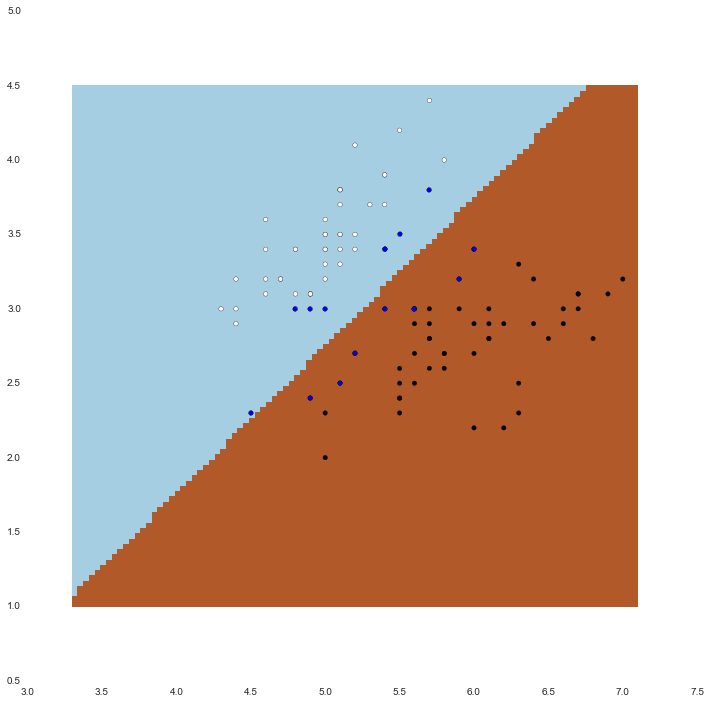

In [34]:
# Visualizing our Support Vectors and C (bias)
# Note that svm.LinearSVC uses the one vs. all methodology 
# where SVC implements one vs one

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y !=2, :2] 

y = iris.target[y!=2]

svc = svm.SVC(kernel='linear', C=1).fit(X, y)
#svc = svm.LinearSVC(C=1).fit(X, y)

plot_estimator(svc, X, y)

# and then plot actually data points
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

In [36]:
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

def fn_kernel(x1, x2):    
    return np.array([x1, x2, x1**2.0 + x2**2.0])  ## return an array of x1, x2, and the sum of the vectors squared

In [38]:
n = 200

X, Y = make_circles(n_samples=n, noise=0.07, factor=0.4)  ## generate data set with circular shape

A = X[Y==0]
B = X[Y==1]

# where X,Ys are in regards to our cartesian coordinate 
X0_orig = A[:,0]
Y0_orig = A[:,1]

X1_orig = B[:,0]
Y1_orig = B[:,1]

frac0 = len(A) / float(len(Y))
frac1 = len(B) / float(len(Y))

print "Percentage of '0' labels:", frac0
print "Percentage of '1' labels:", frac1

Percentage of '0' labels: 0.5
Percentage of '1' labels: 0.5


In [39]:
C = np.array([fn_kernel(x,y) for x,y in zip((X0_orig),(Y0_orig))])
X0 = C[:,0]
Y0 = C[:,1]
Z0 = C[:,2]

D = np.array([fn_kernel(x,y) for x,y in zip((X1_orig),(Y1_orig))])
X1 = D[:,0]
Y1 = D[:,1]
Z1 = D[:,2]

Projecting dataset to R^3


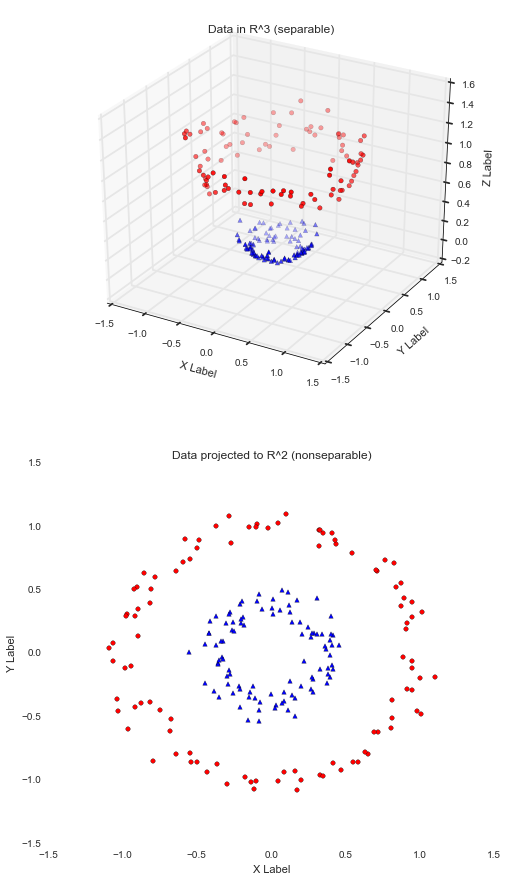

In [40]:
def plot_projection():    
    fig = plt.figure(figsize=(8,15))
    ax = fig.add_subplot(211, projection='3d')

    ax.scatter(X0, Y0, Z0, c='r', marker='o')
    ax.scatter(X1, Y1, Z1, c='b', marker='^')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title("Data in R^3 (separable)")

    # Project data to X/Y plane
    ax2d = fig.add_subplot(212)
    ax2d.scatter(X0, Y0, c='r', marker='o')
    ax2d.scatter(X1, Y1, c='b', marker='^')

    ax2d.set_xlabel('X Label')
    ax2d.set_ylabel('Y Label')
    ax2d.set_title("Data projected to R^2 (nonseparable)")

    plt.show()
    
def main():
    
    print 'Projecting dataset to R^3'
    plot_projection()
    
if __name__ == '__main__':
    main()

ON YOUR OWN

In [76]:
def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    # ? 
    x_min, x_max =X[:,0].min() -1, X[:,0].max() +.1
    y_min, y_max =X[:,1].min() -1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z= estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z=Z.reshape (xx.shape)
    plt.figure(figsize=(12,12))
    plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1], c=y)

In [78]:
# Visualizing our Support Vectors and C (bias)

# Note that svm.LinearSVC uses the one vs. all methodology 
# where SVC implements one vs one 

iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y !=2,:2] 
y = iris.target[y!=2]

In [109]:
svc = svm.SVC(kernel='poly', C=1).fit(X, y)

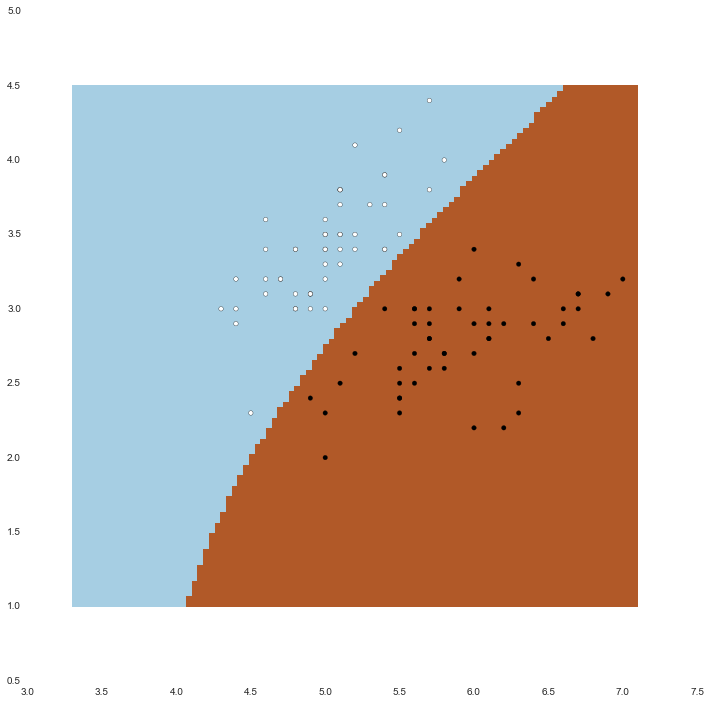

In [110]:
plot_estimator(svc,X,y)
# and then plot actually data points
#plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

In [111]:
def train_and_measure(classifier, x, y, tsize):
    from sklearn import cross_validation
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=tsize, random_state=1234)
    clf = classifier.fit(xtrain, ytrain)

    #Print the accuracy on the test and training dataset
    training_accuracy = clf.score(xtrain, ytrain)
    test_accuracy = clf.score(xtest, ytest)
    print classifier
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print


train_and_measure(svc, X, y, .2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy on training data: 1.00
Accuracy on test data:     1.00



In [2]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# develop your "tuned parameters"
tuned_parameter = {'C':range(1,100),'kernel':['linear','poly']}
grid = GridSearchCV(SVC, param_grid=tuned_parameter)
#grid.fit(X,y)
print grid

GridSearchCV(cv=None, estimator=<class 'sklearn.svm.classes.SVC'>,
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly'], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)
